# Introduction

This is a book created from markdown and executable code.

See @knuth84 for additional discussion of literate programming.


## Hello, ModelingToolkit!

First, load all modules needed for the _hello, world_ example for `ModelingToolkit.jl`.

In [2]:
using ModelingToolkit                # <1>
using ModelingToolkitStandardLibrary # <2>
using DifferentialEquations          # <3>
using Plots                          # <4>

1. Acausal modeling framework for building models
1. Collection of reusable component models commonly used in modeling various systems
1. State-of-the-art collection of differential equations solvers
1. Creating visualizations from simulation outputs

Next, the independent and dependent variables are defined.

Here, `t` is the independent variable representing time and `x` is a variable which depends on time, `t`.

In [16]:
@variables t x(t)

2-element Vector{Num}:
    t
 x(t)

An operator must also be defined which performs differentiation with respect to time, `t`.

In [20]:
D = Differential(t)

(::Differential) (generic function with 3 methods)

Model parameters are defined in a similar fashion. These are inputs not outputs.

In [18]:
@parameters τ

1-element Vector{Num}:
 τ

Constants can also be defined to represent known quantities, e.g., gravity, speed of light, etc.

In [19]:
@constants h = 1

1-element Vector{Num}:
 h

Create a system of ordinary differential equations, of type `ODESystem`, which consists of a single equation.

In [21]:
@named fol = ODESystem([D(x) ~ (h - x) / τ])

Model fol with 1 equations
States (1):
  x(t)
Parameters (1):
  τ

Now that a system or _model_exists, we must describe a simulation that we want to perform on this model. We call this a problem, and assign it to type `ODEProblem`.

There are several inputs we can use to create the problem we wish to study - to start, only consider the ordered arguments shown below:

1. **model** which has type `ODESystem`
1. **initial conditions** which is represented by a `Pair`[^pair]
1. **time span** which is represented by a `Tuple`[^tuple]
1. **parameter values** which again is represented by a `Pair`

In [23]:
prob = ODEProblem(fol, [x => 0.0], (0.0, 10.0), [τ => 3.0])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 1-element Vector{Float64}:
 0.0

Once a problem has been defined, we use the common `solve` interface. In this simple example, only 1 argument is provided - the `ODEProblem`.

In [25]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 14-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.0010999999999999998
  0.011099999999999997
  0.11109999999999996
  0.44196924781807967
  1.0112520758966859
  1.7621013896357889
  2.7411196006326954
  3.954782507222947
  5.435343082434807
  7.201735027334962
  9.291406745592692
 10.0
u: 14-element Vector{Vector{Float64}}:
 [0.0]
 [3.333277778395056e-5]
 [0.00036659945265974064]
 [0.0036931634343634343]
 [0.03635598665335361]
 [0.13698489268755673]
 [0.28615114066001385]
 [0.44421130189743585]
 [0.5989648996141729]
 [0.7323994349297618]
 [0.836636389514038]
 [0.9093330812230747]
 [0.9548191028045533]
 [0.9643240555350271]

In [28]:
sol isa ODESolution

true

Finally, we want to create a graph using the data from our solution. This is very easy since there exists a plotting recipe specifically for `ODESolution` objects (which you can see from above is exactly the type produces by the `solve` function).

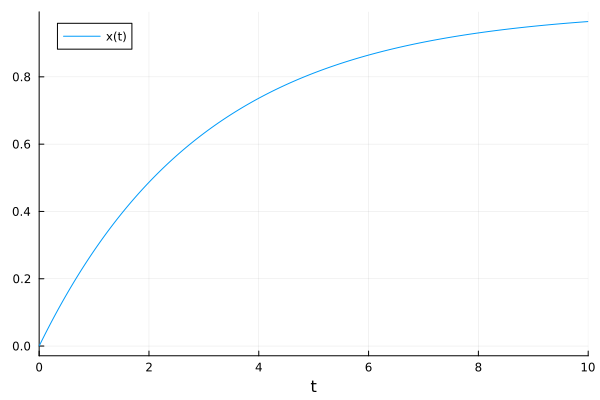

In [26]:
plot(sol)

That was easy! There is only one output plotted because there was only one dependent variable in our model. When working with larger models, specify which variables should be plotted by providing a list to the `idxs` keyword argument (along with any other [attributes](https://docs.juliaplots.org/latest/attributes/) you want to modify).

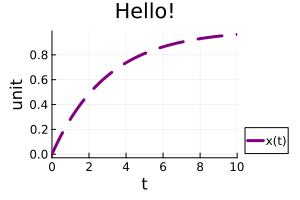

In [47]:
plot(
    sol;
    idxs=[x],
    size=(300,200),
    title="Hello!",
    ylabel="unit",
    legend=:outerbottomright,
    color=:purple,
    linewidth=3,
    linestyle=:dash
)

[^pair]: In Julia, a `Pair` is a collection of two elements. A `Pair` has fields `first` and `second` for accessing each element. To construct a `Pair`, the sytax is `[first => second]` (notice the surrounding square brackets).
[^tuple]: In Julia, a `Tuple` is a collection of any number of elements. Accessing elements of a `Tuple` is only possible using their index as a `Tuple` does not have field names. To construct a `Tuple`, the syntax is `(1, 'b', pi)`(notice the surrounding parentheses).